# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_4$"
- El mensaje que llegó fue: "12, 18, 9, 25"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?

In [5]:
import numpy as np
m = 16
a = 5
b = 3


i=7
x0=7



secuencia =[x0]
for i in range(i - 1) :
    xn = (a*secuencia [-1] + b) % m
    secuencia.append(xn)
    


secuencia = np.array(secuencia)

secuencia

array([ 7,  6,  1,  8, 11, 10,  5])

In [7]:
l1 = 4
l2 = 7
l3 = 0
l4 = 20


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [44]:
def montecarlo1(f,N,a,b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)


import numpy as np
import pandas as pd

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [45]:
def f1(x):
    return np.sqrt(1+x**4)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/np.log(x)
def f4(x):
    return np.exp(-(x//2)/2)

def montecarlo(f,N,a,b):
    u = np.random.uniform(a,b,N)
    media = np.mean(f(u))
    return media*(b-a)

a=4
b=5
N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns = ["Aproximacion1", "Error1","Aproximacion2","Error2","Aproximacion3","Error3", "Aproximacion4", "Error4"])
for i in N:
    proximacion1 = montecarlo(f1, int(i), a, b)
    proximacion2 = montecarlo(f2, int(i), a, b)
    proximacion3 = montecarlo(f3, int(i), a, b)
    proximacion4 = montecarlo(f4, int(i), a, b)
    table.loc[i, "Aproximacion1"] = proximacion1
    table.loc[i, "Aproximacion2"] = proximacion2
    table.loc[i, "Aproximacion3"] = proximacion3
    table.loc[i, "Aproximacion4"] = proximacion4
    table.loc[i, "Error1"] = abs(20.3583 - proximacion1)
    table.loc[i, "Error2"] = abs(0.405885 - proximacion2)
    table.loc[i, "Error3"] = abs(0.667003 - proximacion3)
    table.loc[i, "Error4"] = abs(0.00756977 - proximacion4)



In [56]:
table

,Aproximacion1,Error1,Aproximacion2,Error2,Aproximacion3,Error3,Aproximacion4,Error4
10.0,19.37827,0.98003,0.405446,0.000439,0.674106,0.007103,0.367879,0.36031
100.0,20.442612,0.084312,0.40725,0.001365,0.665392,0.001611,0.367879,0.36031
1000.0,20.463666,0.105366,0.408254,0.002369,0.667957,0.000954,0.367879,0.36031
10000.0,20.332128,0.026172,0.405884,0.000001,0.667561,0.000558,0.367879,0.36031
100000.0,20.34855,0.00975,0.405942,0.000057,0.666901,0.000102,0.367879,0.36031


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

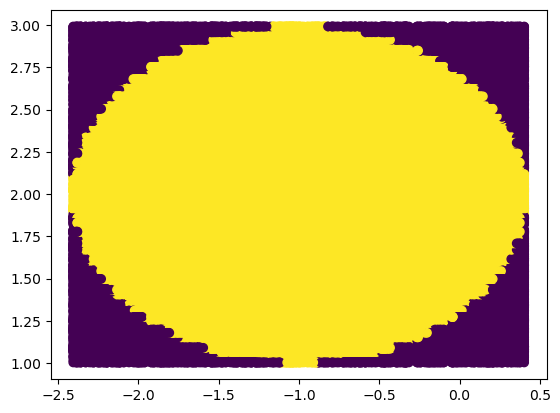

In [14]:

def bernoulli(x,y):
    return (x**2+2*y**2) <= (-2*x+8*y-7)


x = np.random.uniform(-2.41, 0.41, 400)
y = np.random.uniform(1, 3, 400)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))

In [20]:
def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x,y)
    AR = (xb-xa)*(yb-ya)
    return np.mean(B)*AR
N = [10, 100, 1000, 10000, 10000, 100000]
table2 = pd.DataFrame(columns = ["Aproximación", "Error"], index=N)

for i in N:
    ap2 = montecarlo2(bernoulli, -2.41, 0.41, 1, 3, int(i))
    table2.loc[i, "Aproximación"] = ap2
    AD = (0.41-(-2.41)*(3-1))
    C = (((1-(ap2/AD))/(ap2/AD)))**1/2
    table2.loc[i, "Error"] = np.log10(C)-(1/2)*np.log10(i)
table2

,Aproximación,Error
10,2.82,-0.869262
100,4.512,-2.099275
1000,4.47252,-2.572211
10000,4.448268,-3.056163
10000,4.448268,-3.056163
100000,4.442515,-3.552417


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [1]:
import pandas as pd
import numpy as np

In [22]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [24]:
import random 
T0 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D0 = np.array([1.00, 1.00])

T1 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D1 = np.array([50.00, 1.00])

T2 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D2 = np.array([1.00, 50.00])

T3 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D3 = np.array([50.00, 50.00])

x = [np.array([0, 0])]

T = [T0, T1, T2, T3]
D = [D0, D1, D2, D3]

for k in range(100000):
    i = random.choices([0, 1, 2, 3], weights = df["$p_i$"])[0]
    xkm1 = T[1] @ x[-1] + D[i]
    x.append(xkm1)

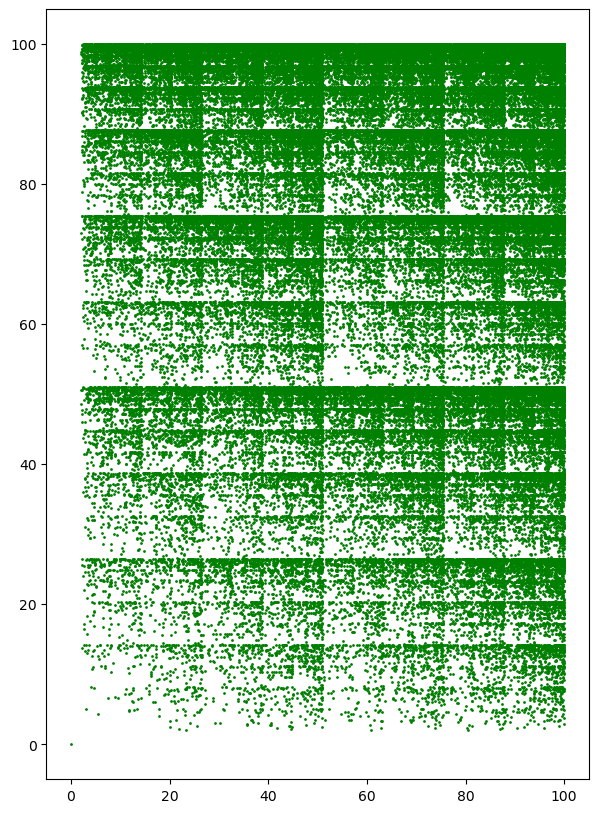

In [25]:
resultado = np.array(x)
plt.figure(figsize=(7, 10))
plt.scatter(resultado[:, 0], resultado[:, 1], s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]
data = getClose(["AAPL","MSFT" ], "2015-01-01", "2019-12-01")






[*********************100%%**********************]  2 of 2 completed


In [30]:
import numpy as np
R = (data - data.shift())/data.shift()
r = np.log(data/data.shift())

,AAPL,MSFT
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.028576,-0.009239
2015-01-06,0.000094,-0.014786
2015-01-07,0.013925,0.012626
2015-01-08,0.037702,0.028994
...,...,...
2019-11-22,-0.000878,0.000736
2019-11-25,0.017382,0.010904
2019-11-26,-0.007839,0.005276


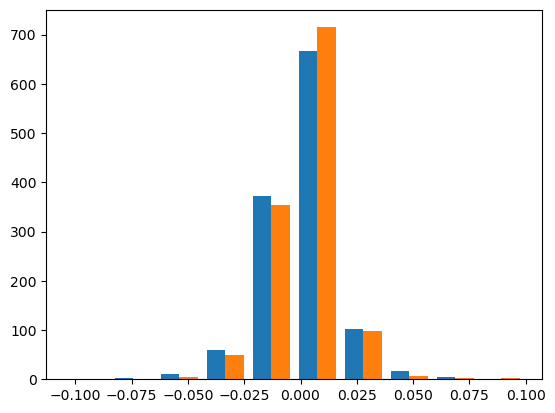

In [31]:
plt.figure()
plt.hist(r)
r

Calcule los rendimientos diarios junto con sus características estadísticas

In [32]:
R = (data - data.shift())/data.shift()

In [33]:
data.describe()

,AAPL,MSFT
count,1237.000000,1237.000000
mean,35.921202,74.370824
std,10.560745,30.858317
min,20.826061,35.021557
25%,26.372368,47.559975
50%,35.138294,64.791611
75%,44.004375,100.118263
max,65.320518,147.079239


Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [34]:
R.mean()

AAPL    0.000916
MSFT    0.001147
dtype: float64

In [35]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size = (dias, N))
    fechas = pd.date_range(start = fecha_inicio, periods = dias)
    return pd.DataFrame(index=fechas, data=R_sim)

simA = sim_R(R["AAPL"].mean(), R["AAPL"].std(), "2020-01-01", 365, 1000)
simA

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,-0.014362,-0.017858,-0.001584,-0.007776,-0.020385,-0.000201,0.021504,0.016215,0.019632,0.004524,...,-0.005905,0.011800,0.013650,0.001467,0.027290,-0.020124,0.013206,0.001679,-0.014511,-0.000526
2020-01-02,0.029491,-0.001047,-0.014749,0.026629,0.025211,0.011972,0.003825,0.013726,0.031093,0.001813,...,0.012445,0.012561,0.011958,0.006308,-0.008858,-0.001544,0.002114,-0.015509,0.000085,0.028608
2020-01-03,0.007338,-0.013461,-0.001452,0.018431,0.036296,0.005742,0.006147,-0.010500,0.009267,0.012953,...,0.004525,0.014348,0.024593,0.013553,0.014230,0.010262,0.002003,0.033132,-0.005459,0.014942
2020-01-04,-0.013402,-0.006034,0.008340,0.025166,0.017122,0.013082,0.019356,0.016732,-0.027837,0.017119,...,0.009536,-0.011800,0.024088,0.024728,0.022883,-0.009807,-0.003486,0.008418,0.010790,-0.016234
2020-01-05,0.001924,0.037023,-0.017407,0.008140,-0.002161,0.005292,-0.006847,-0.013435,-0.000960,0.004800,...,-0.001152,0.023428,-0.003256,0.000885,-0.023848,0.005630,0.007570,-0.000444,0.013865,0.019429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.002929,0.000269,-0.016250,0.007033,0.030407,0.015165,-0.005591,-0.002813,0.003340,0.007107,...,-0.002354,0.004880,0.000874,-0.011354,0.003009,-0.005459,-0.005729,-0.002083,-0.008204,-0.013992
2020-12-27,0.018849,-0.010228,-0.004359,0.004916,-0.021566,-0.006287,0.017215,-0.014902,0.030292,0.010729,...,0.001670,0.018343,0.007863,0.018468,-0.001323,-0.012417,-0.002751,-0.013376,-0.010667,-0.008338
2020-12-28,-0.027961,0.006896,0.005622,0.023524,0.013358,0.003663,0.009919,-0.006182,0.027378,-0.009886,...,0.009454,-0.010038,0.000723,0.019863,-0.007036,-0.006669,0.025752,-0.001008,0.029652,-0.003855
2020-12-29,-0.019998,0.034404,0.011223,-0.003802,0.007590,0.013986,0.026587,-0.012361,0.002305,0.027037,...,-0.020672,0.017467,-0.001791,0.003393,-0.017958,0.004309,0.014198,0.005717,0.007544,0.011839


In [49]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size = (dias, N))
    fechas = pd.date_range(start = fecha_inicio, periods = dias)
    return pd.DataFrame(index=fechas, data=R_sim)

simM = sim_R(R["MSFT"].mean(), R["MSFT"].std(), "2020-01-01", 365, 1000)
simM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,0.015137,0.020166,0.010093,-0.005131,0.011071,-0.004939,0.029504,0.021346,0.025763,-0.000104,...,0.002997,0.007704,0.016555,0.009752,-0.005406,0.039886,-0.008718,0.007061,-0.003006,0.011817
2020-01-02,-0.011584,0.002345,-0.001868,-0.010041,0.007201,-0.002123,-0.019876,0.027037,0.009172,-0.001192,...,-0.033608,0.002730,0.005392,-0.003238,0.011188,0.022137,0.001174,-0.011870,-0.006631,0.002426
2020-01-03,0.010255,-0.010247,-0.003078,0.004033,0.000251,0.007875,0.010206,0.028374,0.000538,0.013676,...,-0.012099,0.015671,0.015520,0.004841,-0.004925,-0.006004,0.001358,0.012421,0.030302,-0.006251
2020-01-04,-0.003053,0.012252,-0.009166,-0.017432,-0.005586,0.004136,0.017834,0.018273,0.010387,-0.005059,...,-0.026530,-0.009529,0.008369,-0.011812,-0.017563,0.021022,-0.018153,0.008303,0.015640,0.002089
2020-01-05,-0.002672,-0.021716,-0.003676,0.036016,-0.009745,0.011103,0.018752,-0.003767,-0.017923,0.019778,...,-0.001124,0.004478,0.009022,0.004641,0.017189,0.026040,-0.024544,0.011912,-0.016646,-0.016113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,-0.020574,-0.009365,0.012915,-0.000377,0.008102,0.003122,0.011101,-0.009634,0.006229,0.031685,...,0.007337,0.000768,0.017791,-0.018887,0.012500,0.000400,-0.007827,0.016543,0.001029,-0.016757
2020-12-27,-0.049623,0.012433,0.017270,0.001195,-0.017761,-0.020506,-0.001638,-0.007842,0.000487,0.016122,...,-0.005483,0.012689,-0.024655,-0.016499,0.012940,0.016864,-0.006851,0.008212,-0.010943,-0.028093
2020-12-28,0.010065,0.001915,0.021109,0.004912,0.009444,-0.005681,0.014608,0.019207,0.003540,-0.010549,...,0.001512,-0.029559,0.017881,0.018326,-0.000620,-0.000201,0.004427,0.022139,-0.004312,-0.019671
2020-12-29,0.014811,-0.022278,0.010385,-0.006321,0.015618,0.013958,0.014011,0.011558,-0.023533,0.007340,...,-0.005101,0.028648,-0.028820,0.008501,0.002532,0.004512,-0.009761,0.019443,0.020552,0.019794


Calcule los precios con base en los rendimientos simulados

In [44]:
precios_simuladosA = (1 + simA).cumprod() * data["AAPL"][-1]
precios_simuladosA


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,64.240572,64.012710,65.073405,64.669837,63.847986,65.163515,66.578189,66.233443,66.456190,65.471497,...,64.791784,65.945735,66.066283,65.272281,66.955287,63.865018,66.037356,65.286041,64.230843,65.142363
2020-01-02,66.135089,63.945679,64.113647,66.391922,65.457668,65.943682,66.832851,67.142552,68.522533,65.590164,...,65.598129,66.774066,66.856288,65.684019,66.362217,63.766436,66.176985,64.273532,64.236332,67.005939
2020-01-03,66.620409,63.084892,64.020551,67.615599,67.833524,66.322339,67.243651,66.437547,69.157498,66.439736,...,65.894957,67.732133,68.500462,66.574222,67.306582,64.420832,66.309567,66.403065,63.885679,68.007147
2020-01-04,65.727548,62.704266,64.554469,69.317226,68.994982,67.189954,68.545211,67.549173,67.232356,67.577089,...,66.523355,66.932912,70.150469,68.220454,68.846739,63.789077,66.078401,66.962061,64.574975,66.903111
2020-01-05,65.853991,65.025790,63.430797,69.881449,68.845896,67.545518,68.075865,66.641637,67.167784,67.901472,...,66.446729,68.501047,69.922033,68.280828,67.204908,64.148230,66.578646,66.932322,65.470296,68.202944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,149.468549,97.978502,64.864677,65.923808,138.233915,99.214125,63.610524,185.242588,130.671730,76.693910,...,135.372959,120.249112,45.095327,94.422492,76.901016,85.722956,50.776766,117.753676,53.935422,82.778404
2020-12-27,152.285874,96.976405,64.581905,66.247913,135.252716,98.590362,64.705579,182.482183,134.630001,77.516741,...,135.599054,122.454884,45.449925,96.166314,76.799299,84.658500,50.637084,116.178548,53.360100,82.088229
2020-12-28,148.027875,97.645163,64.945013,67.806314,137.059481,98.951457,65.347385,181.354125,138.315915,76.750372,...,136.881026,121.225686,45.482779,98.076441,76.258946,84.093926,51.941095,116.061463,54.942344,81.771739
2020-12-29,145.067563,101.004559,65.673883,67.548545,138.099699,100.335432,67.084796,179.112426,138.634740,78.825452,...,134.051411,123.343180,45.401320,98.409257,74.889476,84.456266,52.678551,116.724950,55.356825,82.739871


In [50]:
precios_simuladosM = (1 + simM).cumprod() * data["MSFT"][-1]
precios_simuladosM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,148.384239,149.119253,147.646899,145.421632,147.789883,145.449571,150.484171,149.291721,149.937337,146.156416,...,146.609645,147.297746,148.591519,147.597038,145.381352,152.001751,144.897190,147.203738,145.732172,147.898894
2020-01-02,146.665381,149.468875,147.371112,143.961478,148.854113,145.140763,147.493182,153.328058,151.312520,145.982248,...,141.682458,147.699863,149.392727,147.119158,147.007942,155.366664,145.067260,145.456397,144.765816,148.257690
2020-01-03,148.169434,147.937316,146.917531,144.542032,148.891426,146.283700,148.998440,157.678554,151.393972,147.978655,...,139.968205,150.014400,151.711262,147.831305,146.283874,154.433907,145.264321,147.263125,149.152524,147.330879
2020-01-04,147.717029,149.749775,145.570951,142.022427,148.059771,146.888745,151.655721,160.559887,152.966518,147.230052,...,136.254853,148.584841,152.980934,146.085051,143.714679,157.680455,142.627290,148.485889,151.485339,147.638653
2020-01-05,147.322292,146.497805,145.035820,147.137535,146.616979,148.519665,154.499600,159.955083,150.224914,150.142026,...,136.101731,149.250187,154.361167,146.763058,146.184919,161.786466,139.126654,150.254698,148.963724,145.259742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,260.210866,167.203631,129.846100,152.539841,112.554230,190.615183,170.594883,269.553074,162.642885,240.383124,...,167.003396,161.447748,166.628910,260.265129,244.239055,303.054960,284.268572,263.627606,144.030726,317.644374
2020-12-27,247.298345,169.282440,132.088574,152.722074,110.555196,186.706449,170.315390,267.439318,162.722140,244.258594,...,166.087744,163.496427,162.520644,255.970963,247.399388,308.165538,282.320961,265.792526,142.454552,308.720876
2020-12-28,249.787360,169.606600,134.876861,153.472261,111.599295,185.645806,172.803308,272.576003,163.298247,241.681829,...,166.338937,158.663587,165.426672,260.661839,247.245947,308.103605,283.570805,271.676979,141.840291,302.647890
2020-12-29,253.487033,165.828104,136.277615,152.502123,113.342253,188.236975,175.224452,275.726540,159.455345,243.455808,...,165.490402,163.208919,160.659017,262.877834,247.871929,309.493776,280.802946,276.959226,144.755445,308.638593


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [51]:
valor_deseadoA = data["AAPL"][-1]*1.02
data["AAPL"][-1], valor_deseadoA

(65.1766357421875, 66.48016845703125)

In [52]:
sobrepasaA = valor_deseadoA <= precios_simuladosA
sobrepasaA

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2020-01-02,False,False,False,False,False,False,True,True,True,False,...,False,True,True,False,False,False,False,False,False,True
2020-01-03,True,False,False,True,True,False,True,False,True,False,...,False,True,True,True,True,False,False,False,False,True
2020-01-04,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,True,False,True
2020-01-05,False,False,False,True,True,True,True,True,True,True,...,False,True,True,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,True,True,False,False,True,True,False,True,True,True,...,True,True,False,True,True,True,False,True,False,True
2020-12-27,True,True,False,False,True,True,False,True,True,True,...,True,True,False,True,True,True,False,True,False,True
2020-12-28,True,True,False,True,True,True,False,True,True,True,...,True,True,False,True,True,True,False,True,False,True
2020-12-29,True,True,False,True,True,True,True,True,True,True,...,True,True,False,True,True,True,False,True,False,True


In [53]:
valor_deseadoM = data["MSFT"][-1]*1.02
data["MSFT"][-1], valor_deseadoM

(146.1715850830078, 149.09501678466796)

In [54]:
sobrepasaM = valor_deseadoM <= precios_simuladosM
sobrepasaM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,False,True,False,False,False,False,True,True,True,False,...,False,False,False,False,False,True,False,False,False,False
2020-01-02,False,True,False,False,False,False,False,True,True,False,...,False,False,True,False,False,True,False,False,False,False
2020-01-03,False,False,False,False,False,False,False,True,True,False,...,False,True,True,False,False,True,False,False,True,False
2020-01-04,False,True,False,False,False,False,True,True,True,False,...,False,False,True,False,False,True,False,False,True,False
2020-01-05,False,False,False,False,False,False,True,True,True,True,...,False,True,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,True,True,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
2020-12-27,True,True,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
2020-12-28,True,True,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
2020-12-29,True,True,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True


Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

In [55]:
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]
dataa = getClose(["AAPL","MSFT" ], "2020-01-01", "2020-12-01")



[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

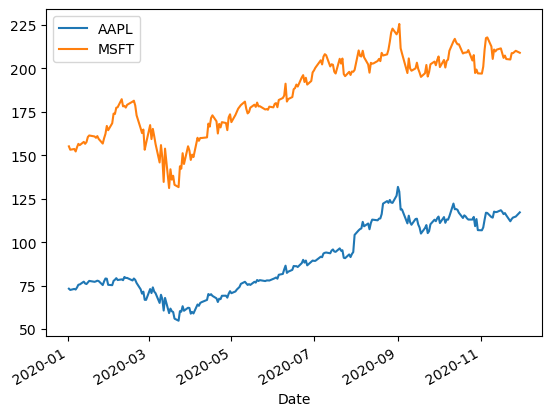

In [56]:
dataa.plot()

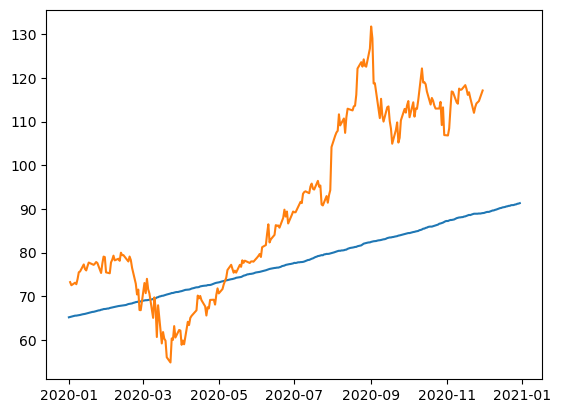

In [57]:
plt.figure()
plt.plot(precios_simuladosA.mean(axis=1))
plt.plot(dataa["AAPL"])

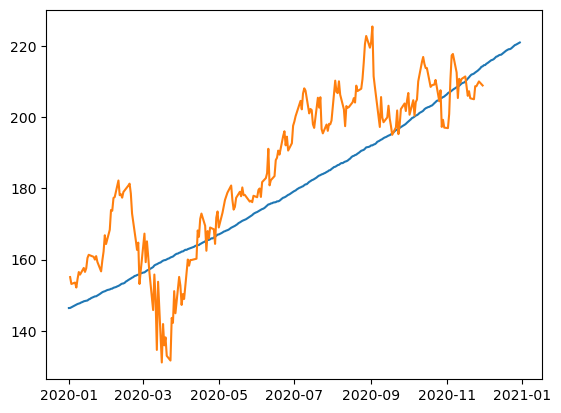

In [58]:
plt.figure()
plt.plot(precios_simuladosM.mean(axis=1))
plt.plot(dataa["MSFT"])

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?

In [59]:

probabilidad = (data.sum()>30).mean()
print(f"La probabilidad de sumar la estatura de 20 personas y sea mayor a 30 metros es del {probabilidad*100}%")

La probabilidad de sumar la estatura de 20 personas y sea mayor a 30 metros es del 100.0%
